# BMES 544 Final Exam

**Author:** [Tony Kabilan Okeke](mailto:tko35@drexel.edu)

In [1]:
%load_ext autoreload

In [2]:
# Imports
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import subprocess
import shlex
import os

from fasta_removeredundants import fasta_removeredundants
from scipy.cluster import hierarchy
from scipy.spatial import distance

- Search [this](covid19spike.fasta) query protein sequence using BLAST, against the Protein Data Bank (PDB) database of sequences.

- From BLAST results, manually download the "FASTA (aligned sequences)" and save this file as **"covidspike.blast.fasta"** to your Dropbox final exam folder. Do not download "complete sequences", which would contain each hit protein in its entirety.
    - The file you get will contain the portions of the protein sequences that formed a local alignment with the query spike protein. I will refer to this file as the "BLAST hits". 

In [3]:
# The aligned sequences are stored in the covidspike.blast.fasta file
blast_hits = "covidspike.blast.fasta"

- Perform multiple alignment of these BLAST hits. The multiple alignment you created needs to be saved to a file named **"covidspike.blast.maln.fasta"** in your Dropbox final exam folder.
    - You may use any multiple alignment of your choice. If the creation of the multiple alignment is not automated in your code, provide the process you followed as comments. 

In [5]:
# Perform multiple alignment of BLAST hits with Clustal Omega
CLUSTALEXE = "/home/kabil/.anaconda3/envs/blast/bin/clustalo"
resultname = "covidspike.blast.maln.fasta"
cmd = shlex.split( f"{CLUSTALEXE}  -i {blast_hits} -o {resultname}" )
process = subprocess.run(cmd, stdout=subprocess.PIPE, universal_newlines=True)

- Generate a non-redundant list of sequences from covidspike.blast.maln.fasta and save it as **"covidspike.blast.maln.nonredundant.fasta"**. I'll call this the "nonredundant list".
    - Use a percent identity threshold of 90% when determining redundancy. Use the alignment already present in the multiple alignment file. No need to realign the sequences. Consider gaps like any other amino acids in your calculation of percent identity.
    - No pair of sequences in the nonredundant list should be more similar to each other than 90%.

In [6]:
nonredundant = fasta_removeredundants(resultname, "covidspike.blast.maln.nonredundant.fasta")

7.80% of sequences were removed.


- Using the multiple alignment of the remainin sequences in the nonredundant list, create a phylogenetic tree using the uncorrected p-distance (calculated as a percentage) as the distance metric.
    - You do not need to re-align the non-redundant sequences. Use them as they were produced from the multiple alignment step.

In [7]:
# Number of sequences
N = len(nonredundant)

# Initialize the distance matrix
dist = np.zeros((N,N))

# Populate matrix (upper triangular)
for i in range(N):
    a = nonredundant[i].seq
    for j in range(i+1, N):
        b = nonredundant[j].seq
        dist[i,j] = (np.array(a) != np.array(b)).mean() * 100

# Convert upper triangular matrix to symmetric matrix
dist = np.where(dist, dist, dist.T)

# Convert distance matrix to squareform
dist = distance.squareform(dist)









- Create a phylogenetic tree using Single/Minimum Linkage method. Show the phylogenetic tree.
The names of the proteins should appear on the phylogenetic tree.
    - You do not need to modify the names of the proteins; use them as they appear in the fasta headers.

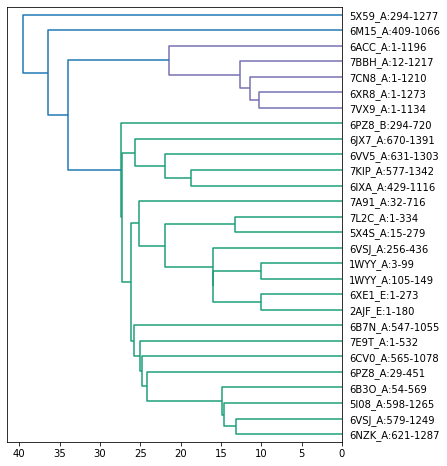

In [22]:
# Perform hierarchical clustering on data to generate phylogenetic tree
phy = hierarchy.linkage(dist, 'single')

# # Plot phylogenetic tree
plt.figure(figsize=(6,8))
cmap = plt.cm.Dark2(np.linspace(0, 1, 4))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
hierarchy.dendrogram(phy, orientation='left', labels=[seq.name for seq in nonredundant],
                     distance_sort='descending', show_leaf_counts=True)
plt.yticks(fontsize=10)
plt.show()